In [8]:
# 하기의 가설들은 95%의 신뢰수준으로, 5%의 유의수준으로 검증

#-*- coding: utf-8 -*- 
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [50]:
# 시도별 인구 데이터 확인
population = pd.read_csv('./시도별_주민등록_인구현황_20220216174115.csv', encoding='utf8')

In [51]:
population = population.dropna()

In [52]:
population

,지역,인구수,면적
0,서울,"9,911,088",605.2
1,부산,"3,438,710",770.0
2,대구,"2,446,144",883.5
3,인천,"3,010,476",1063.0
4,광주,"1,471,385",501.2
5,대전,"1,480,777",539.8
6,울산,"1,153,901",1057.0
7,세종,"360,907",465.2
8,경기,"13,807,158",10171.0
9,강원,"1,560,172",16875.0


In [53]:
# 시도별 대중교통 이용현황 확인
bus = pd.read_csv('./한국교통안전공단_대중교통 이용인원 현황_20201231.csv', encoding='cp949')

In [54]:
bus

,구분,평일,인구수
0,서울,3295972,9911088
1,부산,755854,3438710
2,대구,285446,2446144
3,인천,547445,3010476
4,광주,139922,1471385
5,대전,169340,1480777
6,울산,92606,1153901
7,세종,20319,360907
8,경기,2159097,13807158
9,강원,55231,1560172


In [55]:
# 인구대비 대중교통 이용률 계산
bus['이용률'] = bus['평일']/bus['인구수']*100

In [56]:
# 수도권과 비수도권 각각 대중교통 이용인원, 전체인구수 도출
cap_user = bus['평일'][0]+bus['평일'][3]+bus['평일'][8]
cap_pop = bus['인구수'][0]+bus['인구수'][3]+bus['인구수'][8]

ter_user = sum(bus['평일']) - cap_user
ter_pop = sum(bus['인구수']) - cap_pop

In [57]:
# 도출한 값으로 데이터프레임 생성
area = ['수도권', '비수도권']
user = [cap_user,ter_user]
pop = [cap_pop, ter_pop]

bus2 = pd.DataFrame({'user':user,'pop':pop},index=area)
bus2

,user,pop
수도권,6002514,26728722
비수도권,2232498,26252239


In [58]:
# 카이제곱검정
# 귀무가설 : 수도권과 비수도권의 대중교통 이용률에는 통계적으로 유의한 연관이 없을 것이다.
# 대립가설 : 수도권과 비수도권의 대중교통 이용률에는 통계적으로 유의한 연관이 있을 것이다.

stats.chi2_contingency(bus2)

(1442576.0890612928,
 0.0,
 1,
 array([[ 4403133.82317442, 28328102.17682558],
        [ 3831878.17682558, 24652858.82317442]]))

In [59]:
# P밸류 0.05 이하로 귀무가설 기각, 대립가설 채택. 수도권과 비수도권의 대중교통 이용률에는 통계적으로 유의한 연관이 있다.

In [60]:
# 수도권과 비수도권의 빈도수 차이가 2배이상이 나므로 이중 검정을 실시
# 피셔의 정확검정으로 이중 검정

oddsratio, pvalue = stats.fisher_exact(bus2)
oddsratio, pvalue

(2.640768059933839, 0.0)

In [61]:
# 검정결과 대중교통 이용률에는 통계적으로 유의한 연관이 있다.

In [62]:
# 전국 기업 소재 현황
company = pd.read_csv('./전국 기업.csv', encoding='cp949')
company

,기업코드,국문기업명,영문기업명,대표이사명,본사우편번호,본사주소,시도
0,407830,에셋플러스 글로벌플랫폼액티브,Assetplus Global Platform Active,양인찬,13524.0,경기 성남시 분당구 판교역로192번길 14 리치투게더센터 6층,경기
1,407820,에셋플러스 코리아플랫폼액티브,Assetplus Korea Platform Active,양인찬,13524.0,경기 성남시 분당구 판교역로192번길 14 리치투게더센터 6층,경기
2,407170,MASTER 스마트커머스액티브,MASTER SC Active,이정복,3051.0,서울 종로구 북촌로 104 메리츠자산운용,서울
3,407160,MASTER 테크미디어텔레콤액티브,MASTER TMT Active,이정복,3051.0,서울 종로구 북촌로 104 메리츠자산운용,서울
4,520045,미래에셋 K200 Auto-KO-P 2212-01 ETN,MiraeAsset K200 Auto-KO-P 2212-01 ETN,최현만,4539.0,서울 중구 을지로5길 26 미래에셋 센터원빌딩 이스트타워,서울
...,...,...,...,...,...,...,...
3825,80,하이트진로,Hitejinro,김인규,135100.0,서울 강남구 영동대로 714,서울
3826,70,삼양홀딩스,SAMYANGHOLDINGS,엄태웅|| 윤재엽,110725.0,서울 종로구 종로33길 31,서울
3827,50,경방,Kyungbang,김준|| 김담,150034.0,서울 영등포구 영중로 15 (영등포동4가),서울
3828,20,동화약품,DongwhaPharm,유준하,4522.0,서울 중구 남대문로9길 24 패스트파이브타워 6~8층(다동),서울


In [63]:
# 필요한 정보로 데이터프레임 생성

index = company['시도'].unique()
cnt = company['시도'].value_counts()
cmpy = pd.DataFrame({'cnt':cnt},index=index)

In [64]:
cmpy = cmpy.drop([cmpy.index[2],cmpy.index[18]])
cmpy

,cnt
경기,934
서울,1784
부산,113
경북,110
제주,9
전남,31
대구,78
경남,126
충남,140
충북,125


In [65]:
# 수도권, 비수도권으로 나누기
cap_cp = cmpy['cnt'][0]+cmpy['cnt'][1]+cmpy['cnt'][11]
ter_cp = sum(cmpy['cnt']) - cap_cp

In [66]:
idx = ['수도권','비수도권']
amt = [cap_cp,ter_cp]

cp_df = pd.DataFrame({'amt':amt,'pop':pop},index=idx)
cp_df

,amt,pop
수도권,2853,26728722
비수도권,970,26252239


In [67]:
# 카이제곱검정
# 귀무가설 : 수도권과 비수도권의 기업수 차이에는 통계적으로 유의한 연관이 없을 것이다.
# 대립가설 : 수도권과 비수도권의 기업수 차이에는 통계적으로 유의한 연관이 있을 것이다.

stats.chi2_contingency(cp_df)

(892.9436935602904,
 3.3557039109053907e-196,
 1,
 array([[1.92875772e+03, 2.67296462e+07],
        [1.89424228e+03, 2.62513148e+07]]))

In [68]:
# P밸류 0.05 이하로 귀무가설 기각, 대립가설 채택. 수도권과 비수도권의 기업수 차이에는 통계적으로 유의한 연관이 있다.
# 수도권과 비수도권의 빈도수 차이가 3배 가까이 나므로 이중 검정을 실시
# 피셔의 정확검정으로 이중 검정

oddsratio, pvalue = stats.fisher_exact(cp_df)
oddsratio, pvalue

(2.8888047717620404, 2.4362771498082716e-205)

In [69]:
# 검정결과 기업의 소재지차이에는 통계적으로 유의한 연관이 있다.

In [70]:
# 전국 의료법인 소재지 현황

hospital = pd.read_csv('./전국 의료법인.csv', encoding='cp949')
hospital

,소재지전체주소,도로명전체주소,시도
0,충남 태안군 태안읍 남문리 627번지 1호,충남 태안군 태안읍 환동로 31,충남
1,서울 성북구 장위동 33번지 7호,서울 성북구 한천로 641 (장위동),서울
2,대구 북구 읍내동 1341번지 5호,대구 북구 칠곡중앙대로 440 (읍내동),대구
3,충남 논산시 취암동 139-2 백제병원,"충남 논산시 시민로294번길 14, 백제병원 (취암동)",충남
4,충남 계룡시 금암동 145번지,충남 계룡시 계룡대로 295 (금암동),충남
...,...,...,...
1564,전남 순천시 대룡동 988번지,전남 순천시 양율길 180 (대룡동),전남
1565,전남 구례군 구례읍 신월리 346번지 43호,NaN,전남
1566,전남 장성군 삼계면 월연리 565번지 1호,NaN,전남
1567,전남 순천시 풍덕동 863번지 3호,전남 순천시 풍덕주택길 14 (풍덕동),전남


In [71]:
# 필요한 정보로 데이터프레임 생성

index = hospital['시도'].unique()
cnt = hospital['시도'].value_counts()
hspt = pd.DataFrame({'cnt':cnt},index=index)
hspt

,cnt
충남,108
서울,87
대구,33
전북,205
경북,152
울산,37
전남,94
경기,226
강원,59
충북,64


In [72]:
# 수도권, 비수도권으로 나누기
cap_hp = hspt['cnt'][1]+hspt['cnt'][7]+hspt['cnt'][13]
ter_hp = sum(hspt['cnt']) - cap_hp

idx = ['수도권','비수도권']
amt = [cap_hp,ter_hp]

hp_df = pd.DataFrame({'amt':amt,'pop':pop},index=idx)
hp_df

,amt,pop
수도권,357,26728722
비수도권,1212,26252239


In [73]:
# 카이제곱검정
# 귀무가설 : 수도권과 비수도권의 의료법인 차이에는 통계적으로 유의한 연관이 없을 것이다.
# 대립가설 : 수도권과 비수도권의 의료법인 차이에는 통계적으로 유의한 연관이 있을 것이다.

stats.chi2_contingency(hp_df)

(480.34076798762413,
 1.8013303739455807e-106,
 1,
 array([[7.91542513e+02, 2.67282875e+07],
        [7.77457487e+02, 2.62526735e+07]]))

In [74]:
# P밸류 0.05 이하로 귀무가설 기각, 대립가설 채택. 수도권과 비수도권의 의료법인 수 차이에는 통계적으로 유의한 연관이 있다.
# 수도권과 비수도권의 빈도수 차이가 3배 가까이 나므로 이중 검정을 실시
# 피셔의 정확검정으로 이중 검정

oddsratio, pvalue = stats.fisher_exact(hp_df)
oddsratio, pvalue

(0.28930354256635565, 2.898245234304465e-112)

In [75]:
# 수도권과 비수도권의 의료법인 수 차이에는 통계적으로 유의한 연관이 있다. (수도권 < 비수도권)
# 의료법인 제도가 의료취약지에 병원급 의료기관 개설을 촉진하기 위해 도입 된 제도라는 점이 영향을 미쳤다고 볼 수 있다.

In [76]:
hos = pd.read_csv('./전국 의료기관.csv', encoding='cp949')
hos

,시도,계,상급종합병원,종합병원,병원,요양병원,정신병원,의원,치과병원,치과의원,조산원,보건소,보건지소,보건진료소,보건의료원,약국,한방병원,한의원
0,서울,23661,14,42,222,124,12,9189,60,4902,3,25,8,0,0,5366,73,3621
1,부산,6967,3,25,136,169,24,2468,24,1306,1,16,11,5,0,1620,18,1141
2,인천,4683,3,17,56,67,16,1633,9,956,1,10,27,26,0,1155,43,664
3,대구,5237,5,13,88,74,16,1884,15,903,0,8,8,8,0,1323,10,882
4,광주,2911,2,21,84,59,7,970,15,635,0,5,1,10,0,701,88,313
5,대전,3078,1,9,46,48,7,1112,6,547,1,5,6,8,0,763,14,505
6,울산,1832,1,8,33,41,7,618,4,388,0,5,8,11,0,427,5,276
7,경기,21784,5,62,277,319,51,7487,38,4481,6,47,120,162,1,5377,112,3239
8,강원,2619,2,13,37,34,9,782,4,416,0,16,97,129,2,697,5,376
9,충북,2863,1,12,37,41,10,912,4,458,1,14,95,159,0,699,11,409


In [130]:
# 필요한 정보로 데이터프레임 생성

hos = hos[['시도','계']]
hos.set_index(hos['시도'],drop=True,inplace=True)

In [78]:
# 수도권, 비수도권으로 나누기
cap_hs = hos['계'][0]+hos['계'][2]+hos['계'][7]
ter_hs = sum(hos['계']) - cap_hs

idx = ['수도권','비수도권']
amt = [cap_hs,ter_hs]

hs_df = pd.DataFrame({'amt':amt,'pop':pop},index=idx)
hs_df

,amt,pop
수도권,50128,26728722
비수도권,48351,26252239


In [79]:
# 카이제곱검정
# 귀무가설 : 수도권과 비수도권의 의료기관 차이에는 통계적으로 유의한 연관이 없을 것이다.
# 대립가설 : 수도권과 비수도권의 의료기관 차이에는 통계적으로 유의한 연관이 있을 것이다.

stats.chi2_contingency(hs_df)

(8.035016507075182,
 0.004588159206176984,
 1,
 array([[   49683.16111003, 26729166.83888997],
        [   48795.83888997, 26251794.16111003]]))

In [80]:
# P밸류 0.05 이하로 귀무가설 기각, 대립가설 채택. 수도권과 비수도권의 의료기관 수 차이에는 통계적으로 유의한 연관이 있다.

In [81]:
# 전국 대규모 점포 소재 현황

bigstore = pd.read_csv('./대규모점포.csv', encoding='cp949')
bigstore

,소재지전체주소,시도,도로명전체주소
0,충남 공주시 금흥동 201번지 1호,충남,NaN
1,대전 동구 용운동 432번지 덕림코아빌딩,대전,"대전 동구 계족로140번길 183, 덕림코아빌딩 (용운동)"
2,경기 고양시 일산동구 장항동 1800번지 라몬테이탈리아노,경기,"경기 고양시 일산동구 연리지로 51, 라몬테이탈리아노 (장항동)"
3,경기 고양시 일산서구 대화동 2603번지,경기,경기 고양시 일산서구 킨텍스로 240 (대화동)
4,경북 안동시 서부동 149번지 40호,경북,경북 안동시 번영4길 15 (서부동)
...,...,...,...
2908,강원 속초시 조양동 1498번지 2호,강원,강원 속초시 조양상가길 25 (조양동)
2909,충남 보령시 신흑동 2240호,충남,충남 보령시 대천항중앙길 66 (신흑동)
2910,충남 보령시 신흑동 2240호,충남,충남 보령시 대천항중앙길 66 (신흑동)
2911,충남 서산시 갈산동 222호,충남,NaN


In [82]:
# 필요한 정보로 데이터프레임 생성

index = bigstore['시도'].unique()
cnt = bigstore['시도'].value_counts()
bstr = pd.DataFrame({'cnt':cnt},index=index)
bstr

,cnt
충남,85
대전,125
경기,512
경북,129
충북,66
경남,249
세종,10
강원,91
부산,309
인천,157


In [83]:
# 수도권, 비수도권으로 나누기
cap_bs = bstr['cnt'][2]+bstr['cnt'][9]+bstr['cnt'][10]
ter_bs = sum(bstr['cnt']) - cap_bs

idx = ['수도권','비수도권']
amt = [cap_bs,ter_bs]

bs_df = pd.DataFrame({'amt':amt,'pop':pop},index=idx)
bs_df

,amt,pop
수도권,1379,26728722
비수도권,1534,26252239


In [84]:
# 카이제곱검정
# 귀무가설 : 수도권과 비수도권의 대규모점포수 차이에는 통계적으로 유의한 연관이 없을 것이다.
# 대립가설 : 수도권과 비수도권의 대규모점포수 차이에는 통계적으로 유의한 연관이 있을 것이다.

stats.chi2_contingency(bs_df)

(11.147317874884282,
 0.0008415325743386728,
 1,
 array([[1.46959402e+03, 2.67286314e+07],
        [1.44340598e+03, 2.62523296e+07]]))

In [85]:
# P밸류 0.05 이하로 귀무가설 기각, 대립가설 채택. 수도권과 비수도권의 대규모점포수 차이에는 통계적으로 유의한 연관이 있다.

In [86]:
# 전국 주요 상권 소재 현황

store = pd.read_csv('./전국 주요 상권 현황.csv', encoding='cp949')
store

,상권번호,상권명,시도코드,시도명,시군구코드,시군구명,상권좌표수,상권좌표,데이터기준일자
0,9138,공덕역_1,11,서울,11440,마포구,19,"126.951086855113,37.5437086852164|126.95108685...",2020-12-31
1,9139,공덕역_2,11,서울,11440,마포구,25,"126.95321229004,37.5466265375676|126.953212291...",2020-12-31
2,9140,디지털미디어시티,11,서울,11440,마포구,44,"126.887123962571,37.5834487598235|126.88655960...",2020-12-31
3,9141,마포역_1,11,서울,11440,마포구,54,"126.949848889864,37.5421381698383|126.94983757...",2020-12-31
4,9142,마포역_2,11,서울,11440,마포구,44,"126.947814199015,37.5432207096313|126.94780571...",2020-12-31
...,...,...,...,...,...,...,...,...,...
1162,10372,동아대부민캠퍼스,26,부산,26140,서구,6,"129.021141559118,35.103350139431|129.021257888...",2020-12-31
1163,10373,동대신동역,26,부산,26140,서구,5,"129.015235871206,35.1120140488436|129.01703930...",2020-12-31
1164,10374,동아대병원,26,부산,26140,서구,7,"129.016351590164,35.1194662001032|129.01652337...",2020-12-31
1165,10375,하단역 3,26,부산,26380,사하구,7,"128.968231685786,35.106090309415|128.961760672...",2020-12-31


In [87]:
# 필요한 정보로 데이터프레임 생성

index = store['시도명'].unique()
cnt = store['시도명'].value_counts()
str = pd.DataFrame({'cnt':cnt},index=index)
str

,cnt
서울,254
강원,47
부산,102
울산,27
경남,49
대구,48
경북,70
광주,43
전남,62
제주,7


In [88]:
# 수도권, 비수도권으로 나누기
cap_s = str['cnt'][0]+str['cnt'][11]+str['cnt'][12]
ter_s = sum(str['cnt']) - cap_s

idx = ['수도권','비수도권']
amt = [cap_s,ter_s]

s_df = pd.DataFrame({'amt':amt,'pop':pop},index=idx)
s_df

,amt,pop
수도권,539,26728722
비수도권,628,26252239


In [89]:
# 카이제곱검정
# 귀무가설 : 수도권과 비수도권의 주요상권수 차이에는 통계적으로 유의한 연관이 없을 것이다.
# 대립가설 : 수도권과 비수도권의 주요상권수 차이에는 통계적으로 유의한 연관이 있을 것이다.

stats.chi2_contingency(s_df)

(8.313545432136332,
 0.003935050404603853,
 1,
 array([[5.88746597e+02, 2.67286723e+07],
        [5.78253403e+02, 2.62522887e+07]]))

In [90]:
# P밸류 0.05 이하로 귀무가설 기각, 대립가설 채택. 수도권과 비수도권의 주요상권수 차이에는 통계적으로 유의한 연관이 있다.

In [91]:
# 전국 공연 행사 소재 현황

concert = pd.read_csv('./전국공연행사정보표준데이터.csv', encoding='cp949')
concert

,소재지도로명주소,시도,소재지지번주소,위도,경도
0,경기 남양주시 화도읍 북한강로 1554,경기,경기 남양주시 화도읍 금남리 174-1,37.647329,127.365632
1,경북 영덕군 영해면 318만세길 36,경북,경북 영덕군 영해면 성내리 산 43,36.529735,129.405085
2,경북 영덕군 영해면 318만세길 36,경북,경북 영덕군 영해면 성내리 산 43,36.529735,129.405085
3,경북 영덕군 영해면 318만세길 36,경북,경북 영덕군 영해면 성내리 산 43,36.529735,129.405085
4,경북 영덕군 영해면 318만세길 36,경북,경북 영덕군 영해면 성내리 산 43,36.529735,129.405085
...,...,...,...,...,...
9346,서울 서초구 남부순환로 2364,서울,서울 서초구 서초동 700,37.477718,127.009818
9347,서울 서초구 남부순환로 2364,서울,서울 서초구 서초동 700,37.477718,127.009818
9348,서울 서초구 남부순환로 2364,서울,서울 서초구 서초동 700,37.477718,127.009818
9349,서울 서초구 남부순환로 2364,서울,서울 서초구 서초동 700,37.477718,127.009818


In [92]:
# 필요한 정보로 데이터프레임 생성

index = concert['시도'].unique()
cnt = concert['시도'].value_counts()
con = pd.DataFrame({'cnt':cnt},index=index)
con

,cnt
경기,1175
경북,488
울산,239
대구,488
전북,218
강원,234
서울,2896
광주,1462
부산,558
인천,153


In [93]:
# 수도권, 비수도권으로 나누기
cap_con = con['cnt'][0]+con['cnt'][6]+con['cnt'][9]
ter_con = sum(con['cnt']) - cap_con

idx = ['수도권','비수도권']
amt = [cap_con,ter_con]

con_df = pd.DataFrame({'amt':amt,'pop':pop},index=idx)
con_df

,amt,pop
수도권,4224,26728722
비수도권,5127,26252239


In [94]:
# 카이제곱검정
# 귀무가설 : 수도권과 비수도권의 공연행사수 차이에는 통계적으로 유의한 연관이 없을 것이다.
# 대립가설 : 수도권과 비수도권의 공연행사수 차이에는 통계적으로 유의한 연관이 있을 것이다.

stats.chi2_contingency(con_df)

(103.97771660653103,
 2.0460432076007426e-24,
 1,
 array([[4.71746190e+03, 2.67282285e+07],
        [4.63353810e+03, 2.62527325e+07]]))

In [95]:
# P밸류 0.05 이하로 귀무가설 기각, 대립가설 채택. 수도권과 비수도권의 공연행사수 차이에는 통계적으로 유의한 연관이 있다.

In [96]:
# 전국 유초중고 학교 소재 현황

school = pd.read_csv('./유초중고.csv', encoding='cp949')
school

,연도,학교급,학교세부유형,고등학교유형,시도,행정구,교육지원청,학교명,본분교,학교상태,설립,남녀공학,우편번호,도로명주소,연락처,팩스번호,홈페이지
0,2020,유치원,유치원,NaN,서울,종로구,중부,린덴바움유치원,본교,기존(원)교,사립,NaN,030-25,서울특별시 종로구 통일로12길 51 . 린덴바움유치원 (무악동),02-730-6207,02-730-6208,https://xn--6n1b61jr3bixr.kr/
1,2020,유치원,유치원,NaN,서울,종로구,중부,배화여자대학교 부속 배화유치원,본교,기존(원)교,사립,NaN,030-39,서울특별시 종로구 필운대로1길 34 (필운동),02-737-1433,02-737-1434,http://www.baewha.ac.kr/mbs/child
2,2020,유치원,유치원,NaN,서울,종로구,중부,봄샘유치원,본교,기존(원)교,사립,NaN,031-24,서울특별시 종로구 율곡로 264 (종로6가),02-764-3210,02-762-7396,http://bomsaem.kidis.co.kr
3,2020,유치원,유치원,NaN,서울,종로구,중부,상명사대부속유치원,본교,기존(원)교,사립,NaN,030-15,서울특별시 종로구 홍지문2길 1 (홍지동),02-396-1602,02-394-6577,http://www.smu-kindergarten.com
4,2020,유치원,유치원,NaN,서울,종로구,중부,서울명신초등학교병설유치원,본교,기존(원)교,공립,NaN,030-93,서울특별시 종로구 낙산길 250 (창신동. 서울명신초등학교),02-744-4633,02-747-0751,http://myungshin.es.kr/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21195,2020,각종학교,각종학교(고교),NaN,경남,김해시,경남,금곡무지개고등학교,본교,신설(원)교,공립,남여공학,508-47,경상남도 김해시 한림면 금곡로182번길 43 (한림면),055-901-1000,055-346-3840,http://kgrb-h.gne.go.kr/
21196,2020,각종학교,각종학교(고교),NaN,경남,밀양시,경남,밀양영화고등학교,본교,기존(원)교,공립,남여공학,504-53,경상남도 밀양시 상남면 평촌중앙로 61-6 (상남면),055-356-7307,055-356-7311,http://myyeonghwa-h.gne.go.kr
21197,2020,각종학교,각종학교(고교),NaN,경남,고성군,경남,경남고성음악고등학교,본교,기존(원)교,공립,남여공학,529-56,경상남도 고성군 하일면 공룡로 987 (하일면),055-672-4455,055-672-7474,http://gngseumak-h.gne.go.kr
21198,2020,각종학교,각종학교(중학),NaN,경남,하동군,경남,지리산중학교,본교,휴(원)교,사립,남여공학,523-09,경상남도 하동군 청암면 삼신봉로 110-8 . 지리산중학교 (청암면),055-883-5152,055-884-5152,http://www.eoulrim-m.gne.kr


In [97]:
# 필요한 정보로 데이터프레임 생성

index = school['시도'].unique()
cnt = school['시도'].value_counts()
sch = pd.DataFrame({'cnt':cnt},index=index)
sch

,cnt
서울,2220
부산,1063
대구,817
인천,953
광주,638
대전,572
울산,455
세종,155
경기,4768
강원,1042


In [98]:
# 수도권, 비수도권으로 나누기
cap_sc = sch['cnt'][0]+sch['cnt'][3]+sch['cnt'][8]
ter_sc = sum(sch['cnt']) - cap_sc

idx = ['수도권','비수도권']
amt = [cap_sc,ter_sc]

sc_df = pd.DataFrame({'amt':amt,'pop':pop},index=idx)
sc_df

,amt,pop
수도권,7941,26728722
비수도권,13259,26252239


In [99]:
# 카이제곱검정
# 귀무가설 : 수도권과 비수도권의 유초중고 학교 수 차이에는 통계적으로 유의한 연관이 없을 것이다.
# 대립가설 : 수도권과 비수도권의 유초중고 학교 수 차이에는 통계적으로 유의한 연관이 있을 것이다.

stats.chi2_contingency(sc_df)

(1430.4054728038882,
 0.0,
 1,
 array([[1.06942292e+04, 2.67259688e+07],
        [1.05057708e+04, 2.62549922e+07]]))

In [100]:
# 수도권과 비수도권의 빈도수 차이가 2배 가량 나므로 이중 검정을 실시
# 피셔의 정확검정으로 이중 검정

oddsratio, pvalue = stats.fisher_exact(sc_df)
oddsratio, pvalue

(0.588237328780546, 3.4481033e-316)

In [101]:
# P밸류 0.05이하로 수도권과 비수도권의 유초중고 학교 수 차이에는 통계적으로 유의한 연관이 있다.

In [102]:
# 전국 대학교 소재 현황

college = pd.read_csv('./시도별 대학교 학교수.csv', encoding='cp949')
college

,지역,학교수
0,서울,38
1,부산,12
2,대구,3
3,인천,3
4,광주,10
5,대전,11
6,울산,2
7,세종,2
8,경기,30
9,강원,8


In [103]:
# 수도권, 비수도권으로 나누기
cap_cl = college['학교수'][0]+college['학교수'][8]+college['학교수'][3]
ter_cl = sum(college['학교수']) - cap_cl

idx = ['수도권','비수도권']
amt = [cap_cl,ter_cl]

cl_df = pd.DataFrame({'amt':amt,'pop':pop},index=idx)
cl_df

,amt,pop
수도권,71,26728722
비수도권,119,26252239


In [104]:
# 카이제곱검정
# 귀무가설 : 수도권과 비수도권의 대학교 수 차이에는 통계적으로 유의한 연관이 없을 것이다.
# 대립가설 : 수도권과 비수도권의 대학교수 차이에는 통계적으로 유의한 연관이 있을 것이다.

stats.chi2_contingency(cl_df)

(12.488033461645106,
 0.0004095671099971651,
 1,
 array([[9.58542911e+01, 2.67286971e+07],
        [9.41457089e+01, 2.62522639e+07]]))

In [105]:
# P밸류 0.05이하로 수도권과 비수도권의 대학교 수 차이에는 통계적으로 유의한 연관이 있다.

In [106]:
# 전국 대학원 소재 현황

university = pd.read_csv('./시도별 대학원 학교수.csv', encoding='cp949')
university

,지역,학교 수
0,서울,396
1,부산,72
2,대구,35
3,인천,26
4,광주,42
5,대전,58
6,울산,10
7,세종,10
8,경기,184
9,강원,41


In [107]:
# 수도권, 비수도권으로 나누기
cap_un = university['학교 수'][0]+university['학교 수'][8]+university['학교 수'][3]
ter_un = sum(university['학교 수']) - cap_un

idx = ['수도권','비수도권']
amt = [cap_un,ter_un]

un_df = pd.DataFrame({'amt':amt,'pop':pop},index=idx)
un_df

,amt,pop
수도권,606,26728722
비수도권,568,26252239


In [108]:
# 카이제곱검정
# 귀무가설 : 수도권과 비수도권의 대학교 수 차이에는 통계적으로 유의한 연관이 없을 것이다.
# 대립가설 : 수도권과 비수도권의 대학교수 차이에는 통계적으로 유의한 연관이 있을 것이다.

stats.chi2_contingency(un_df)

(0.5955717521448599,
 0.4402726086644042,
 1,
 array([[5.92279474e+02, 2.67287357e+07],
        [5.81720526e+02, 2.62522253e+07]]))

In [109]:
# P밸류 0.05이상으로 수도권과 비수도권의 대학교 수 차이에는 통계적으로 유의한 연관이 없다.

In [112]:
# 상관계수 확인
# 각 데이터프레임의 필요한 정보를 모아 합치기

idx = ['수도권','비수도권']
bus_user = [cap_user,ter_user]
comp = [cap_cp,ter_cp]
hosp = [cap_hs,ter_hs]
big_store = [cap_bs,ter_bs]
stores = [cap_s,ter_s]
cons = [cap_con,ter_con]
schl = [cap_sc,ter_sc]
clg = [cap_cl,ter_cl]
unvs = [cap_un,ter_un]

cor_df = pd.DataFrame({'bus':bus_user,
                       'comp':comp,
                       'hosp':hosp,
                       'bigstr':big_store,
                       'store':stores,
                       'concert':cons,
                       'school':schl,
                      'college':clg,
                      'university':unvs,
                      'pop':pop},
                     index=idx)
cor_df

,bus,comp,hosp,bigstr,store,concert,school,college,university,pop
수도권,6002514,2853,50128,1379,539,4224,7941,71,606,26728722
비수도권,2232498,970,48351,1534,628,5127,13259,119,568,26252239


In [123]:
# 스케일링
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

scaler = scaler.fit_transform(cor_df)

scaler

array([[1.        , 1.        , 1.        , 0.89895698, 0.85828025,
        0.82387361, 0.59891395, 0.59663866, 1.        , 1.        ],
       [0.37192716, 0.33999299, 0.96455075, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.93729373, 0.98217337]])

In [122]:
cor_df.corr()

,bus,comp,hosp,bigstr,store,concert,school,college,university,pop
bus,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
comp,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
hosp,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
bigstr,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
store,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
concert,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
school,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
college,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
university,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
pop,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [125]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

<AxesSubplot:>

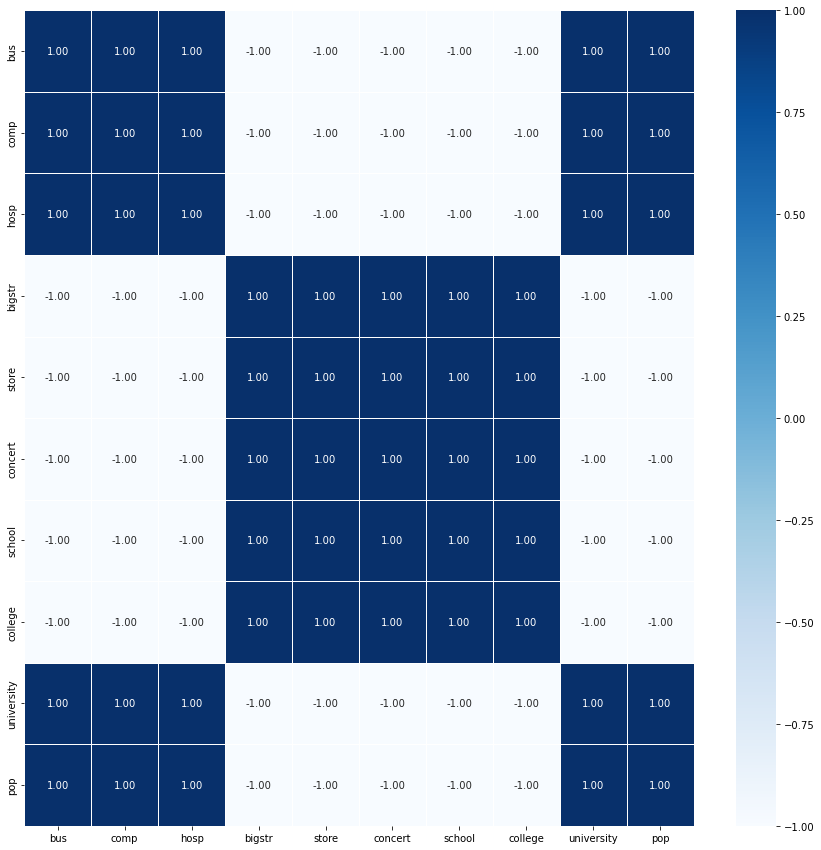

In [126]:
plt.figure(figsize=(15,15))
sns.heatmap(data = cor_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [137]:
# 수도권 비수도권의 상관관계는 구체적 측정이 어려워 원래의 지역구분을 그대로 사용한 데이터프레임 불러오기

In [141]:
df = pd.read_csv('./전국현황.csv', encoding='cp949')
df

,지역,대중교통,기업수,의료기관수,대규모 점포,주요상권,공연행사,유초중고,대학교,대학원,인구수
0,서울,3295972,1784,23661,710,254,2896,2220,38,396,9911088
1,부산,755854,113,6967,309,102,558,1063,12,72,3438710
2,대구,285446,78,5237,157,48,488,817,3,35,2446144
3,인천,547445,135,4683,157,59,153,953,3,26,3010476
4,광주,139922,34,2911,74,43,1462,638,10,42,1471385
5,대전,169340,69,3078,125,30,10,572,11,58,1480777
6,울산,92606,40,1832,39,27,239,455,2,10,1153901
7,세종,20319,12,558,10,1,2,155,2,10,360907
8,경기,2159097,934,21784,512,226,1175,4768,30,184,13807158
9,강원,55231,34,2619,91,47,234,1042,8,41,1560172


In [142]:
df.set_index(df['지역'],drop=True,inplace=True)

In [144]:
df = df.drop('지역',axis=1)
df

,대중교통,기업수,의료기관수,대규모 점포,주요상권,공연행사,유초중고,대학교,대학원,인구수
지역,,,,,,,,,,
서울,3295972,1784,23661,710,254,2896,2220,38,396,9911088
부산,755854,113,6967,309,102,558,1063,12,72,3438710
대구,285446,78,5237,157,48,488,817,3,35,2446144
인천,547445,135,4683,157,59,153,953,3,26,3010476
광주,139922,34,2911,74,43,1462,638,10,42,1471385
대전,169340,69,3078,125,30,10,572,11,58,1480777
울산,92606,40,1832,39,27,239,455,2,10,1153901
세종,20319,12,558,10,1,2,155,2,10,360907
경기,2159097,934,21784,512,226,1175,4768,30,184,13807158


In [145]:
df.corr()

,대중교통,기업수,의료기관수,대규모 점포,주요상권,공연행사,유초중고,대학교,대학원,인구수
대중교통,1.000000,0.976996,0.971511,0.964010,0.957018,0.853601,0.676901,0.866843,0.953747,0.894054
기업수,0.976996,1.000000,0.943084,0.926430,0.923631,0.873980,0.633636,0.891307,0.982766,0.843688
의료기관수,0.971511,0.943084,1.000000,0.965966,0.984762,0.805600,0.822838,0.903669,0.918412,0.966449
대규모 점포,0.964010,0.926430,0.965966,1.000000,0.954732,0.809420,0.721237,0.870502,0.924095,0.900194
주요상권,0.957018,0.923631,0.984762,0.954732,1.000000,0.810924,0.821540,0.923535,0.914766,0.946011
공연행사,0.853601,0.873980,0.805600,0.809420,0.810924,1.000000,0.460756,0.802394,0.891831,0.676329
유초중고,0.676901,0.633636,0.822838,0.721237,0.821540,0.460756,1.000000,0.768012,0.594162,0.922053
대학교,0.866843,0.891307,0.903669,0.870502,0.923535,0.802394,0.768012,1.000000,0.921305,0.851152
대학원,0.953747,0.982766,0.918412,0.924095,0.914766,0.891831,0.594162,0.921305,1.000000,0.797774
인구수,0.894054,0.843688,0.966449,0.900194,0.946011,0.676329,0.922053,0.851152,0.797774,1.000000


<AxesSubplot:>

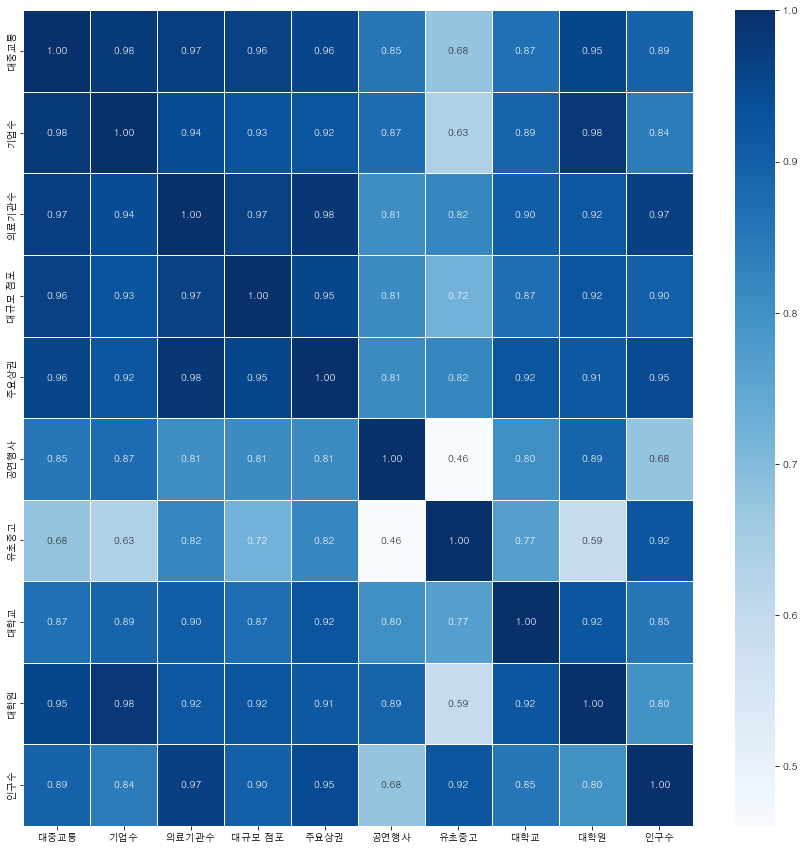

In [149]:
plt.rcParams['font.family'] = 'HYGothic-Medium'
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')